In [2]:
import glob,os,sys,numpy as np,pickle
from ioMicro import *

In [85]:
fl = r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\dic_pos--_C.pkl'
if not os.path.exists(fl):
    zarr_fls = glob.glob(r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023\H0_C\*.zarr')
    dic_pos = {get_ifov(fl_):read_im(fl_,return_pos=True)[-2:] for fl_ in tqdm(zarr_fls)}
    pickle.dump(dic_pos,open(fl,'wb'))
else:
    dic_pos = pickle.load(open(fl,'rb'))

In [87]:
fls = glob.glob(r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\*dic_cts*')
genes =['ASCL1', 'APLN', 'APOE', 'CSF1R', 'ARX', 'AQP4', 'CSF2RA', 'BGN', 'ARHGEF6', 'DOCK11', 'CFTR', 'BEX1', 'FGF10', 'COL15A1', 'BMP2', 'FLT1', 'COL4A5', 'CD40LG', 'FMR1', 'EDA', 'CD74', 'FNDC1', 'EFNB1', 'DACH2', 'FOXP3', 'EGFL6', 'ENPEP', 'GAD1', 'FGF13', 'FBN2', 'IL1RAPL2', 'FREM2', 'FGFR3', 'LAMA4', 'FRZB', 'FILIP1L', 'MBP', 'HTR2C', 'GFAP', 'MRC1', 'IL13RA1', 'IFNG-AS1', 'MT-ATP6', 'LRIG3', 'IL3RA', 'MT-ND3', 'MAOA', 'ITM2A', 'MT-RNR1', 'MT-ND1', 'KLHL1', 'NPY', 'MT-ND4', 'LAMP5', 'PAX6', 'MT-RNR2', 'MT-ND2', 'PCDH11X', 'NRGN', 'MT-ND5', 'PLP1', 'OLIG1', 'NDP', 'PTCHD1-AS', 'OPALIN', 'ROBO1', 'PVALB', 'OPHN1', 'SYTL5', 'SMYD1', 'PDGFRA', 'TAC3', 'SST', 'RORB', 'TENM1', 'TRPC5', 'RPRM', 'TSIX', 'RTKN2', 'TYROBP', 'SCML4', 'VCAN', 'SMOC1', 'VIP', 'SRGN', 'Xist', 'SRPX2', 'TEX13A', 'TH', 'THEMIS', 'TIMP1', 'TMSB4X', 'TNNT2', 'WNT4']
final_counts = {gene:{} for gene in genes}
dic_cms = {}
min_bad =7.5
for fl in tqdm(fls):
    dic_cts,dic_cms_ = pickle.load(open(fl,'rb'))
    dic_cms.update(dic_cms_)
    for gene in final_counts:
        good_cts,bad_cts = dic_cts.get(gene,[{},{}])
        for c in dic_cms_:
            gc = good_cts.get(c,0)
            bc = bad_cts.get(c,0)
            final_counts[gene][c]=gc
            if (bc>min_bad) and (bc>gc):
                final_counts[gene][c]=np.nan

100%|████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 87.56it/s]


In [108]:
np.sort(genes)

array(['APLN', 'APOE', 'AQP4', 'ARHGEF6', 'ARX', 'ASCL1', 'BEX1', 'BGN',
       'BMP2', 'CD40LG', 'CD74', 'CFTR', 'COL15A1', 'COL4A5', 'CSF1R',
       'CSF2RA', 'DACH2', 'DOCK11', 'EDA', 'EFNB1', 'EGFL6', 'ENPEP',
       'FBN2', 'FGF10', 'FGF13', 'FGFR3', 'FILIP1L', 'FLT1', 'FMR1',
       'FNDC1', 'FOXP3', 'FREM2', 'FRZB', 'GAD1', 'GFAP', 'HTR2C',
       'IFNG-AS1', 'IL13RA1', 'IL1RAPL2', 'IL3RA', 'ITM2A', 'KLHL1',
       'LAMA4', 'LAMP5', 'LRIG3', 'MAOA', 'MBP', 'MRC1', 'MT-ATP6',
       'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND5', 'MT-RNR1',
       'MT-RNR2', 'NDP', 'NPY', 'NRGN', 'OLIG1', 'OPALIN', 'OPHN1',
       'PAX6', 'PCDH11X', 'PDGFRA', 'PLP1', 'PTCHD1-AS', 'PVALB', 'ROBO1',
       'RORB', 'RPRM', 'RTKN2', 'SCML4', 'SMOC1', 'SMYD1', 'SRGN',
       'SRPX2', 'SST', 'SYTL5', 'TAC3', 'TENM1', 'TEX13A', 'TH', 'THEMIS',
       'TIMP1', 'TMSB4X', 'TNNT2', 'TRPC5', 'TSIX', 'TYROBP', 'VCAN',
       'VIP', 'WNT4', 'Xist'], dtype='<U9')

In [88]:
cells = np.array(list(dic_cms.keys()))
ifovs = cells//10**6
abs_pos = np.array([dic_pos[ifov] for ifov in ifovs])
abs_pos = abs_pos[:,::-1]*np.array([1,-1])
um_per_pixel = 0.108
cm_cells = np.array([dic_cms[cell][1:] for cell in cells])
cm_cellsf = cm_cells*um_per_pixel+abs_pos

In [112]:
cts = np.array([final_counts['TH'][c] for c in cells ])
cts[np.isnan(cts)]=0
cts_ = np.clip(cts/20,0,1)
sizes = 5+cts_*20
import matplotlib.cm as cmap
colors = cmap.coolwarm(cts_)
napari.view_points(cm_cellsf,face_color=colors,size=sizes)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, -3961.6040000000003, 7139.0740000000005), zoom=0.2171973400553377, angles=(0.0, 0.0, 90.0), perspective=0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((-6789.332, -1132.876, 1.0), (5945.2, 8333.948, 1.0)), current_step=(2828, 1194), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'cm_cellsf' at 0x243ca4d6370>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_ve

In [115]:
save_fl = r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\final_counts.pkl'
pickle.dump([final_counts,cm_cellsf,cells,genes],open(save_fl,'wb'))

In [ ]:
def complete_nan_dic_count(X):
    #print("Correcting the cells in those fovs...")
    bad_ = np.any(np.isnan(X),axis=1)
    cells_bad = np.where(bad_)[0]
    cells_good = np.where(~bad_)[0]

    X_ = X#/np.nansum(X,axis=-1)[:,np.newaxis]
    X_bad_ = X_[cells_bad]
    X_good_ = X_[cells_good]
    best_cells = [np.argsort(np.nanmean(np.abs(X__-X_good_),axis=-1))[:10] for X__ in tqdm(X_bad_[:])]

    X_copy = X.copy()
    for ibad in range(len(best_cells)):   
        ibest = best_cells[ibad]
        where_bad = np.isnan(X_bad_[ibad])
        new_vals = np.nanmedian(X[cells_good][ibest][:,where_bad],axis=0)
        X_copy[cells_bad[ibad],where_bad] = new_vals
        #new_vals = np.nanmedian(X[cells_good][ibest][:,:],axis=0)
        #X_copy[cells_bad[ibad],:] = X[cells_good][ibest[0]]#new_vals
    #dic_count = self.dic_count
    return X_copy

In [ ]:
if False:
    save_fl = r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\final_counts_corrected.pkl'
    final_counts,cm_cellsf,cells,genes = pickle.load(open(save_fl,'rb'))
    cts_all = np.array([[final_counts[gene][c] for c in cells ] for gene in genes]).T
    cts_all_ =complete_nan_dic_count(cts_all)
    save_fl = r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\final_counts_corrected.pkl'
    pickle.dump([cts_all_,cts_all,cm_cellsf,cells,genes],open(save_fl,'wb'))

#### Start here

In [3]:
import sys,os
import numpy as np, matplotlib.pyplot as plt
import pickle
import imp
import glob
from PIL import Image
import tifffile
from tqdm import tqdm_notebook as tqdm

import scanpy as sc
from scipy.stats import zscore
import numpy as np
import pandas as pd

In [4]:
save_fl = r'Y:\Glass_MERFISH\CGBB_ChrX_01_31_2023_Analysis\dic_cts\final_counts_corrected.pkl'
cts_all_,cts_all,cm_cellsf,cells,genes = pickle.load(open(save_fl,'rb'))

In [6]:
#cts_all

In [7]:
data =cts_all_
count_table2 = pd.DataFrame(data=data, index=cells, columns=genes)
celldata2 = pd.DataFrame(data=cm_cellsf, index=cells, columns=['global_x','global_y'])


scdata2 = sc.AnnData(count_table2)
scdata2.obsm["X_spatial"] = np.array(
    celldata2[["global_x", "global_y"]].reindex(
        index=scdata2.obs.index.astype(int)
    )
)
sc.pp.filter_cells(scdata2, min_genes=5)
scdata2.obsm["X_raw"] = scdata2.X.copy()
sc.pp.calculate_qc_metrics(scdata2, percent_top=None, inplace=True)
sc.pp.normalize_total(scdata2, target_sum=np.median(scdata2.obs["total_counts"]))




### Tried volume normalization but did not work well.

#volume = np.array(list(celldata['volume'].reindex(index=scdata.obs.index.astype(int))),dtype=np.float)
#scdata.X = scdata.X/volume[:,np.newaxis]*np.median(volume)



sc.pp.log1p(scdata2)

#scdata2.X = scdata2.to_df().apply(zscore, axis=0).to_numpy()

### Should we use PCA?

### Should we do z-scores. Explore this with spatial maps. Visual inspection.

sc.pp.neighbors(scdata2,use_rep = "X")  #metric='correlation', use_rep = "X"


C:\Users\BINTUL~2\AppData\Local\Temp/ipykernel_23404/3048998639.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  scdata2 = sc.AnnData(count_table2)
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
def plt_clusters(clusters = [0]):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 15), facecolor="black")

    from matplotlib import pylab as plt


    scdata = scdata2
    x = -scdata.obsm['X_spatial'][:, 0]
    y = -scdata.obsm['X_spatial'][:, 1]
    plt.scatter(x, y, c='w', s=1, marker='.')

    for cluster in clusters:#[::-1][:20]:#np.unique(scdata.obs["leiden"]):
        cluster = str(cluster)
        inds = scdata.obs[scdata.obs["leiden"] == cluster].index
        x = -scdata[inds].obsm['X_spatial'][:, 0]
        y = -scdata[inds].obsm['X_spatial'][:, 1]
        plt.scatter(x, y,  s=20, marker='o',label=cluster,c=cmap[int(cluster) % 20])
        #plt.text(np.median(x),np.median(y),cluster,color='w',fontsize=20)
        plt.legend()
    plt.grid(b=False)
    plt.axis("off")
    plt.axis("equal")
    plt.tight_layout()

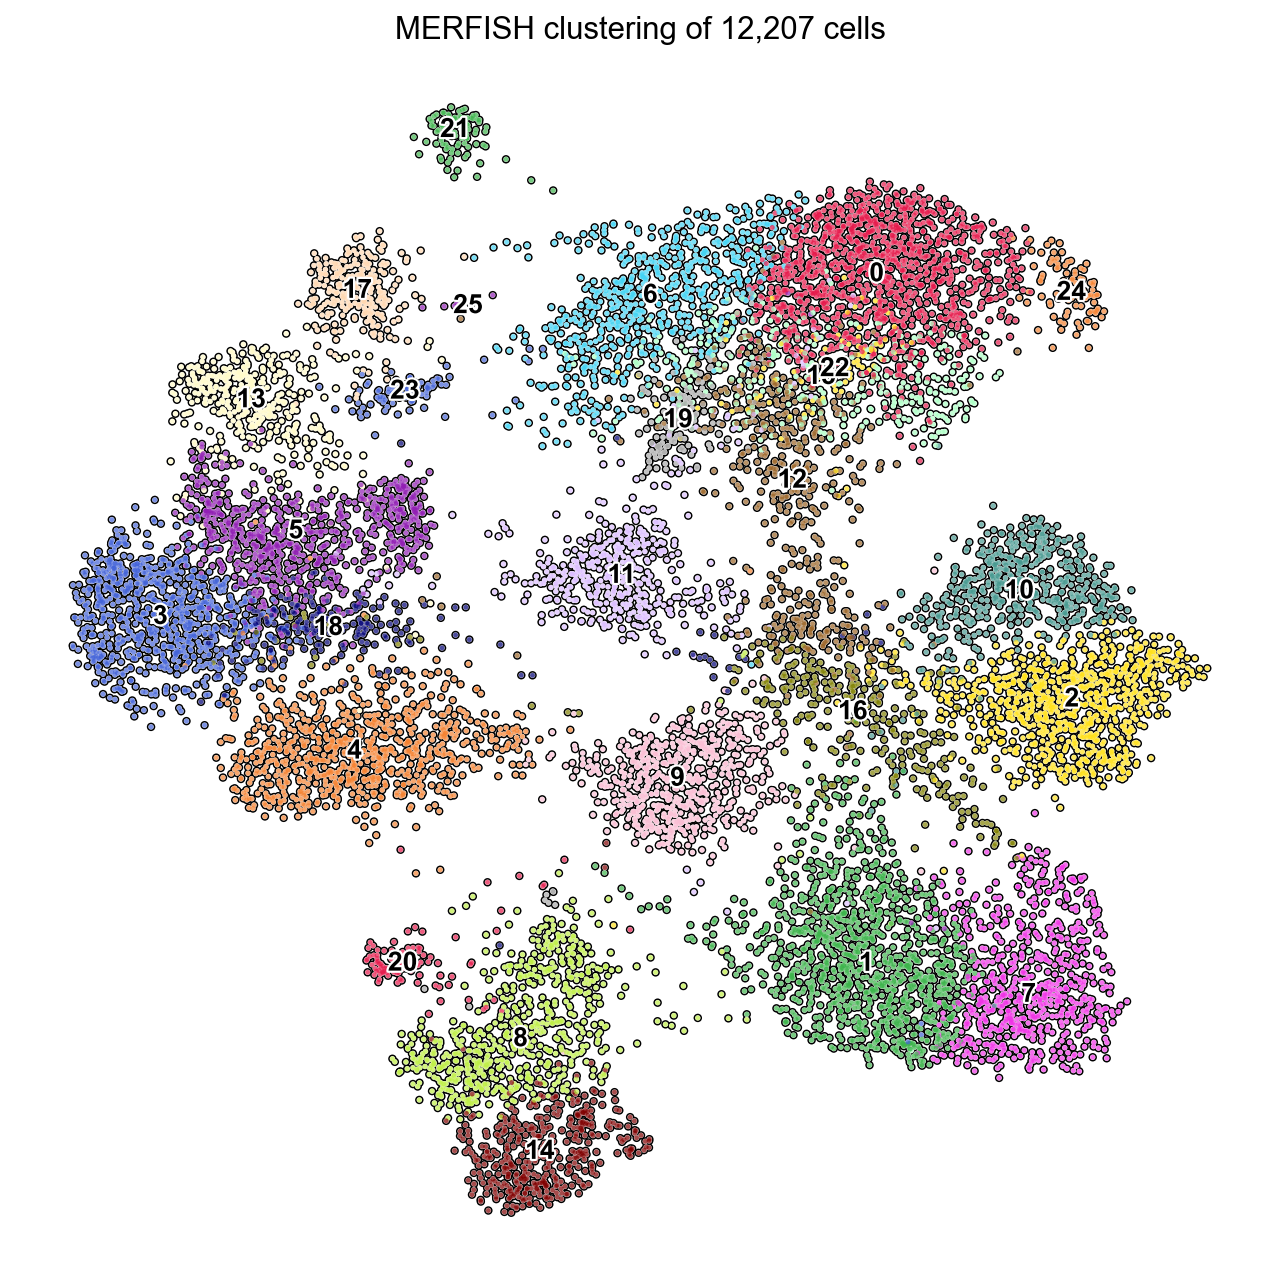

In [8]:

sc.tl.leiden(scdata2, resolution=2) #### 
#plt.figure()
sc.tl.umap(scdata2,random_state=9)
cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

sc.set_figure_params(figsize=(10,10))
sc.pl.umap(
    scdata2,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    size=20,
    legend_fontsize=12,
    legend_fontoutline=2,
    frameon=False,
    title=f"MERFISH clustering of {len(scdata2):,d} cells",
    palette=cmap
)

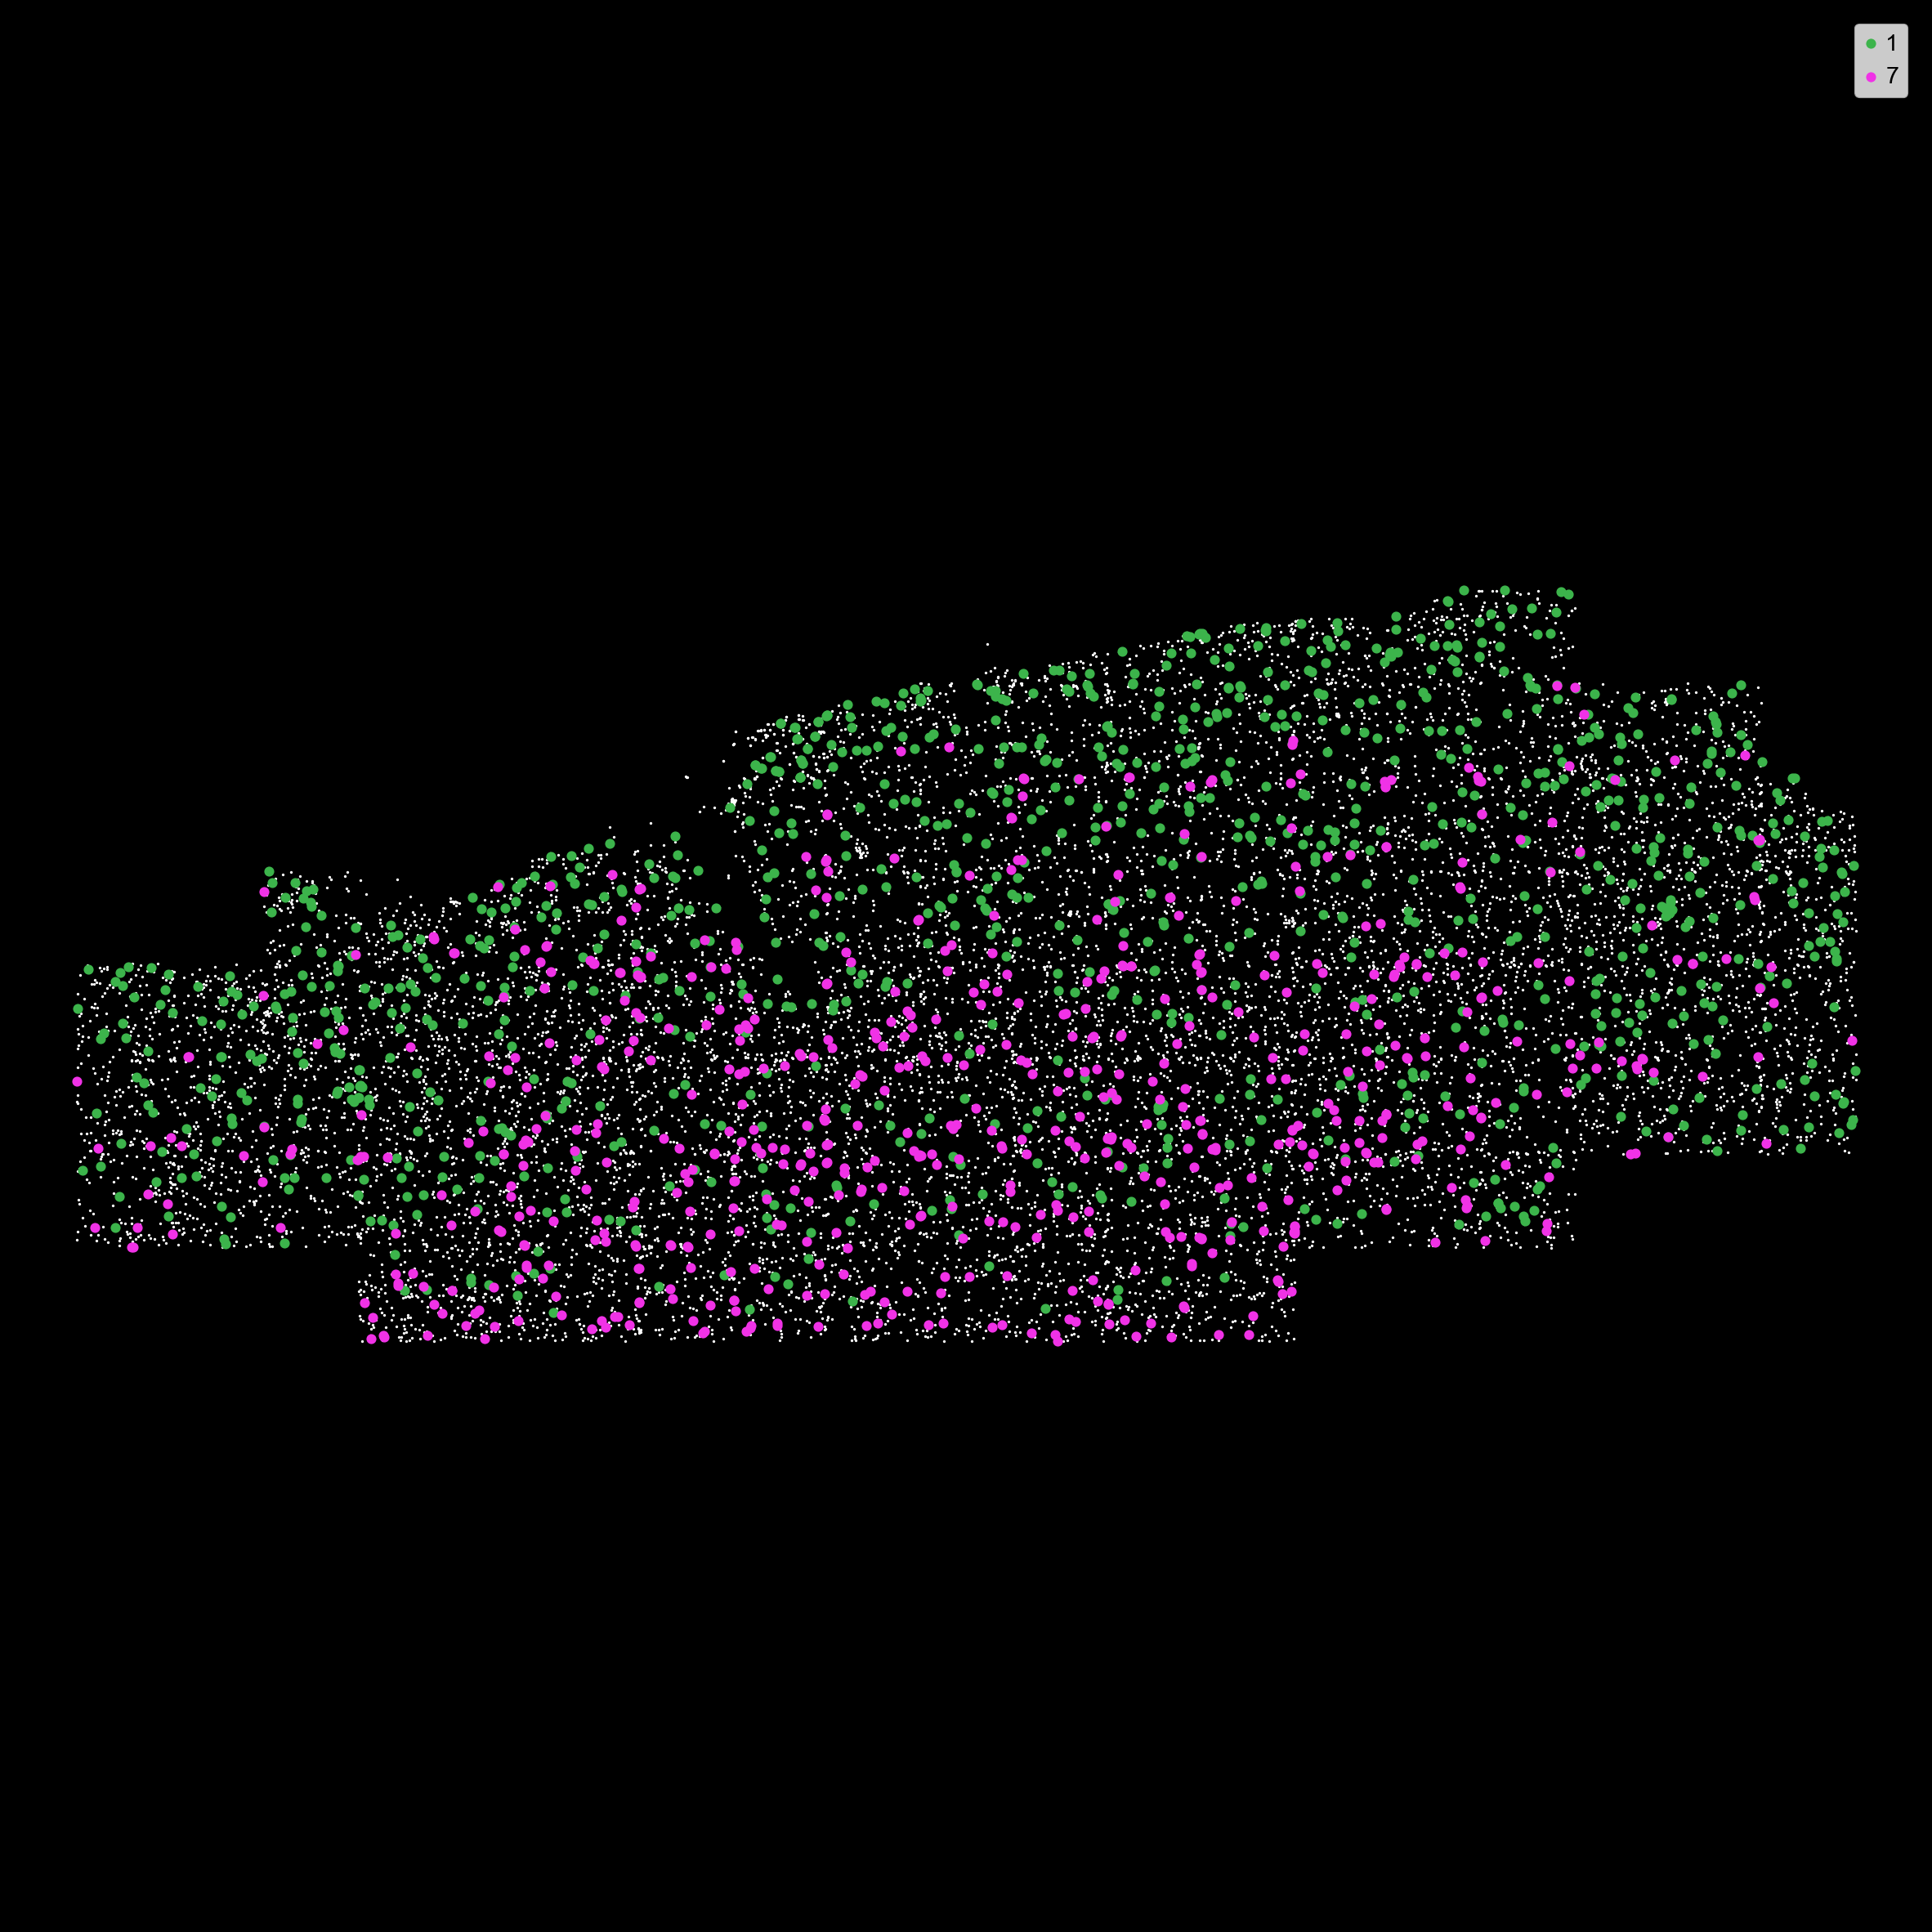

In [12]:
plt_clusters([1,7])

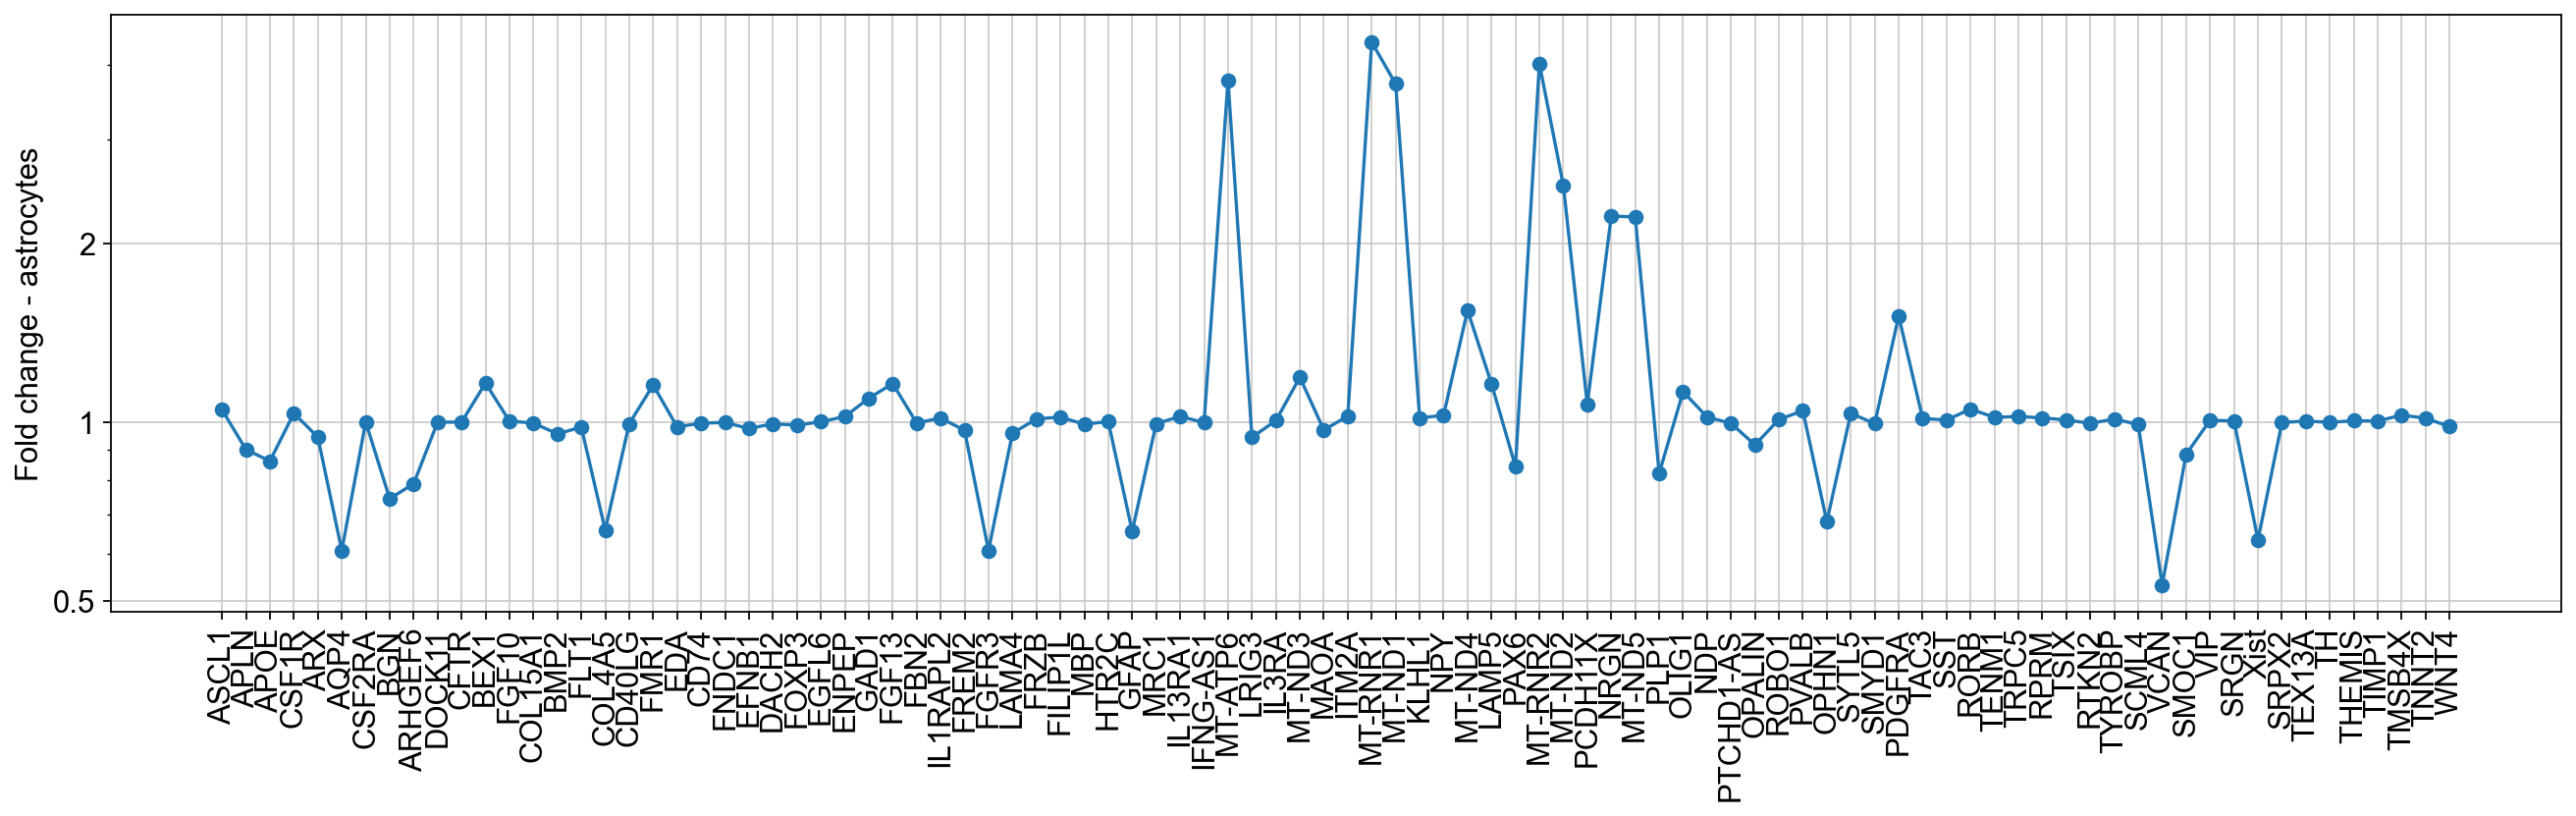

In [22]:
X_cl  = np.array(scdata2[scdata2.obs["leiden"]=='1'].X)
X_cl2  = np.array(scdata2[scdata2.obs["leiden"]=='7'].X)
X = np.array(scdata2.X)
zscore = np.exp(np.mean(X_cl,axis=0)-np.mean(X_cl2,axis=0))#/np.std(X,axis=0)
plt.figure(figsize=(20,5))
plt.semilogy(zscore,'o-')
plt.ylabel('Fold change - astrocytes')
plt.yticks([0.5,1,2],[0.5,1,2])
plt.xticks(np.arange(len(zscore)),genes,rotation='vertical');

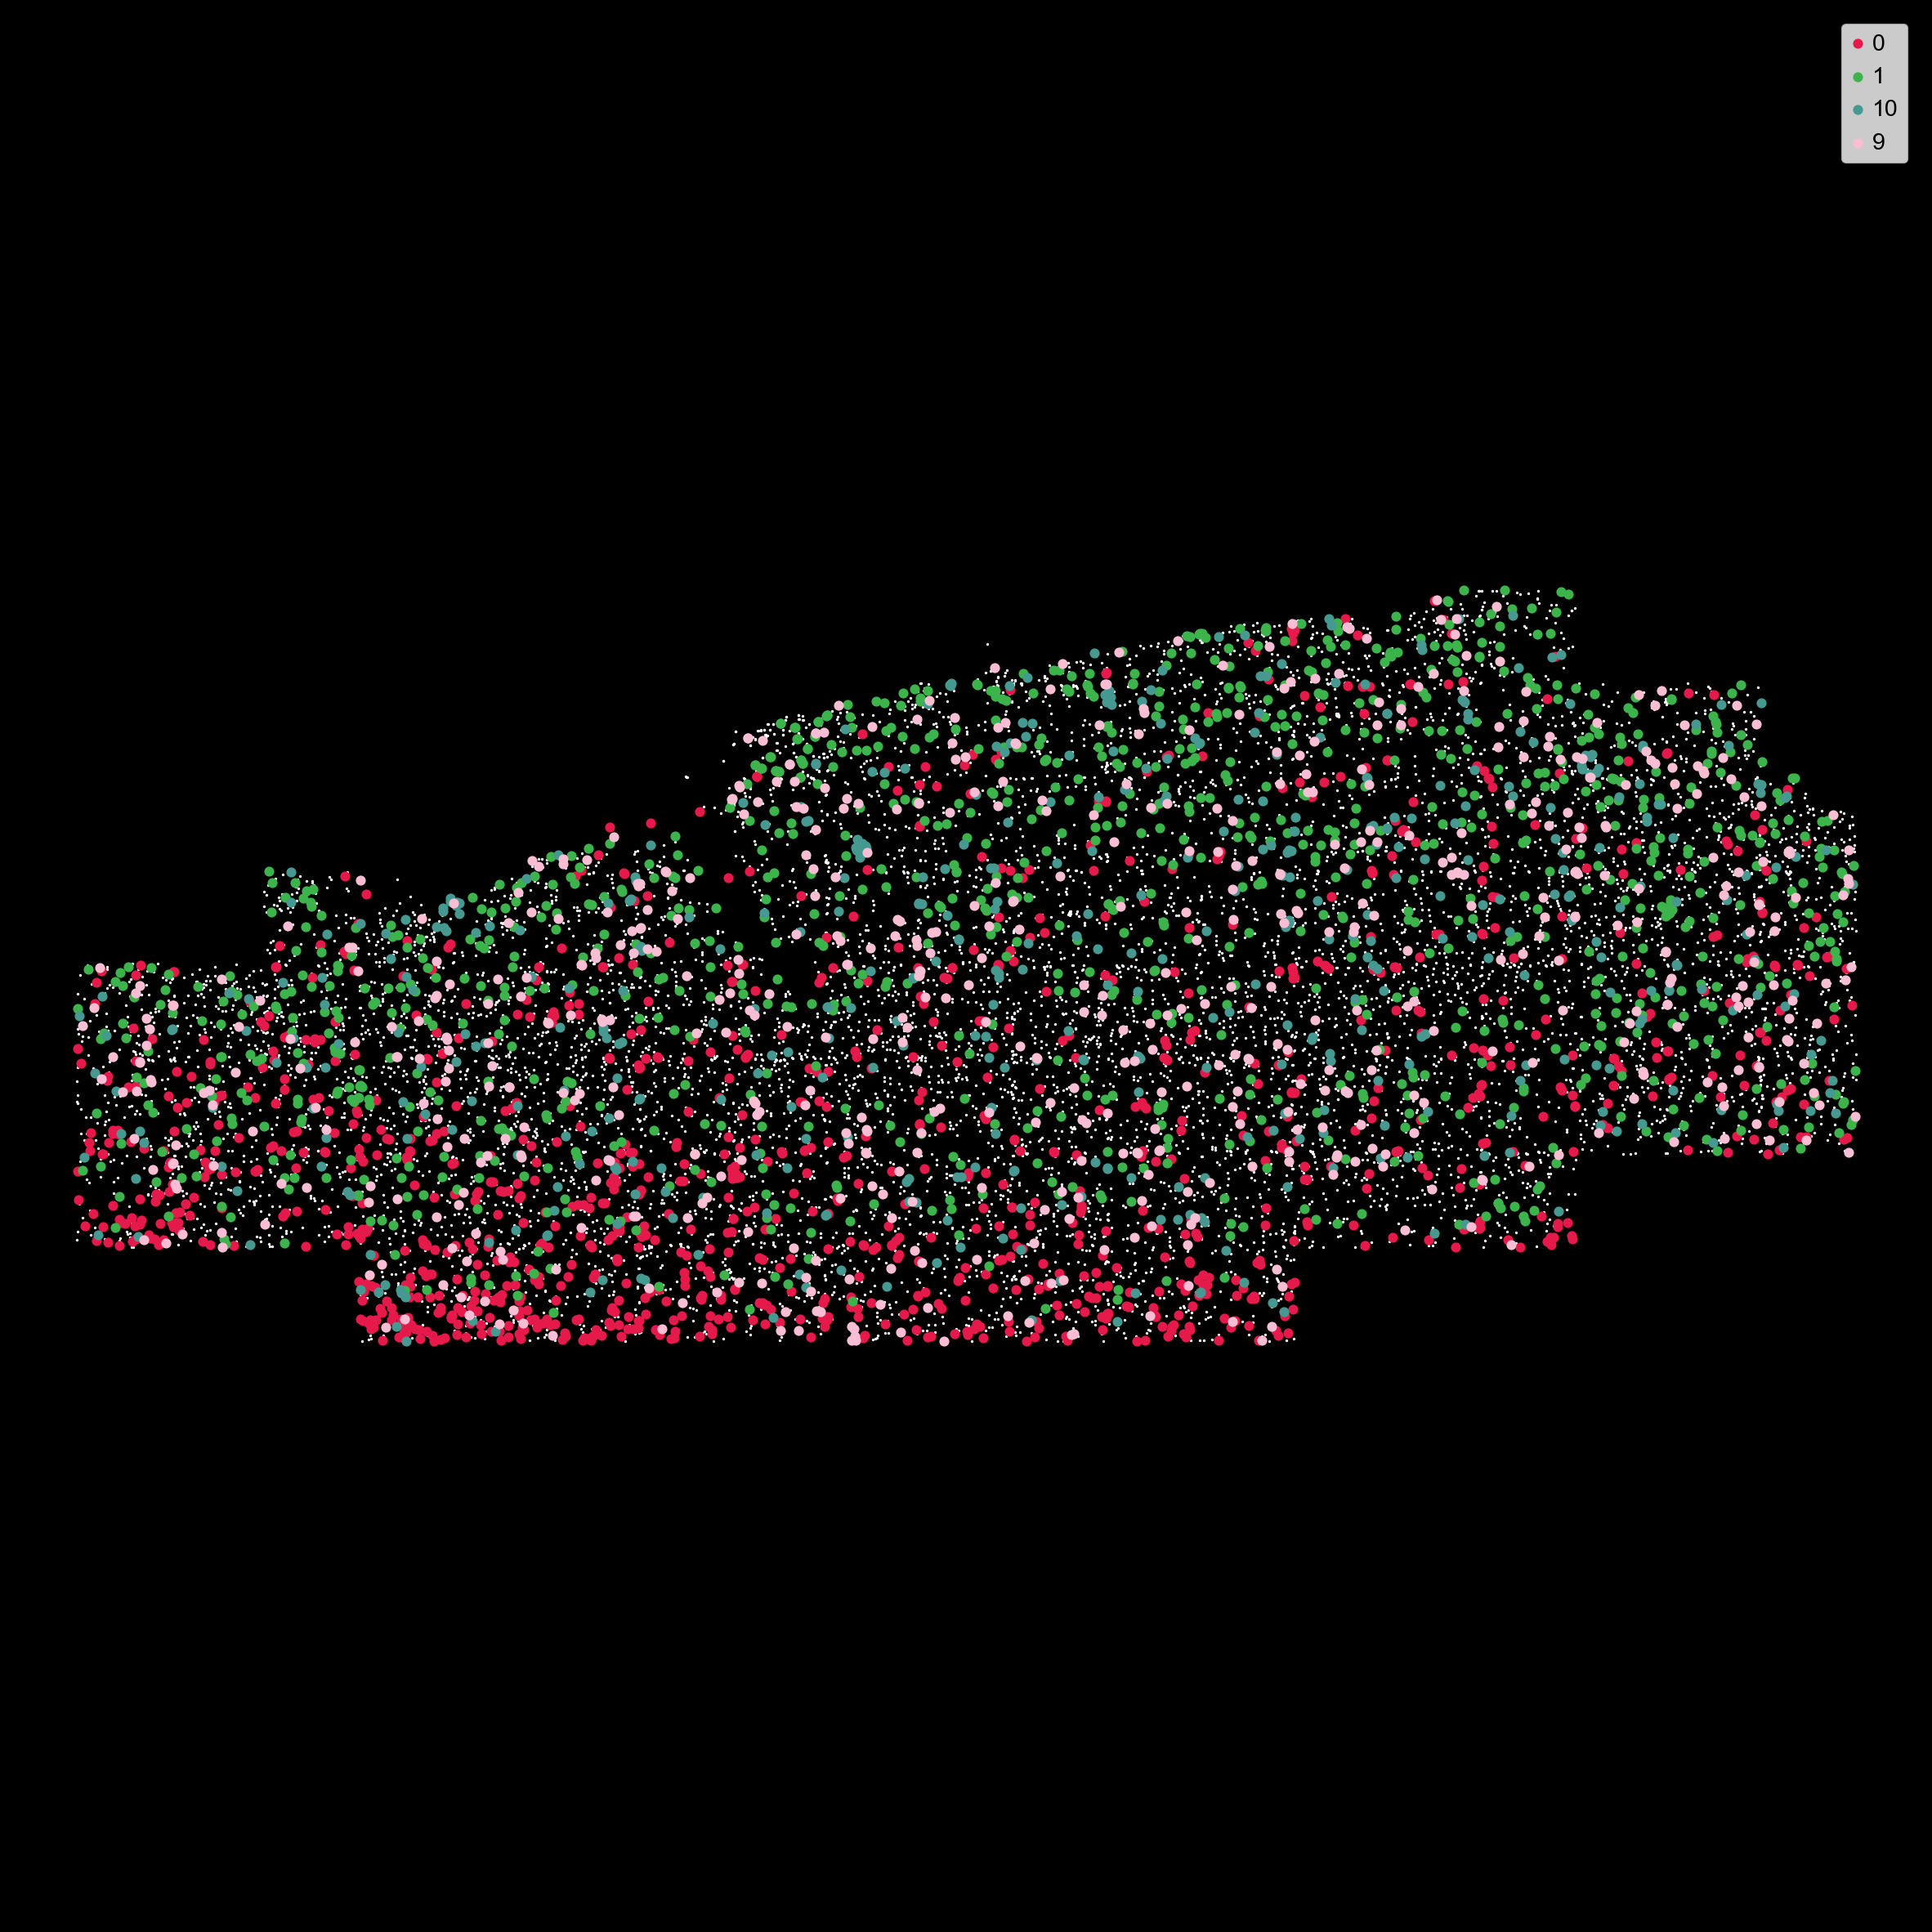

In [255]:
plt_clusters(clusters = [0,1,10,9])

In [268]:
print(np.sort(genes))

['APLN' 'APOE' 'AQP4' 'ARHGEF6' 'ARX' 'ASCL1' 'BEX1' 'BGN' 'BMP2' 'CD40LG'
 'CD74' 'CFTR' 'COL15A1' 'COL4A5' 'CSF1R' 'CSF2RA' 'DACH2' 'DOCK11' 'EDA'
 'EFNB1' 'EGFL6' 'ENPEP' 'FBN2' 'FGF10' 'FGF13' 'FGFR3' 'FILIP1L' 'FLT1'
 'FMR1' 'FNDC1' 'FOXP3' 'FREM2' 'FRZB' 'GAD1' 'GFAP' 'HTR2C' 'IFNG-AS1'
 'IL13RA1' 'IL1RAPL2' 'IL3RA' 'ITM2A' 'KLHL1' 'LAMA4' 'LAMP5' 'LRIG3'
 'MAOA' 'MBP' 'MRC1' 'MT-ATP6' 'MT-ND1' 'MT-ND2' 'MT-ND3' 'MT-ND4'
 'MT-ND5' 'MT-RNR1' 'MT-RNR2' 'NDP' 'NPY' 'NRGN' 'OLIG1' 'OPALIN' 'OPHN1'
 'PAX6' 'PCDH11X' 'PDGFRA' 'PLP1' 'PTCHD1-AS' 'PVALB' 'ROBO1' 'RORB'
 'RPRM' 'RTKN2' 'SCML4' 'SMOC1' 'SMYD1' 'SRGN' 'SRPX2' 'SST' 'SYTL5'
 'TAC3' 'TENM1' 'TEX13A' 'TH' 'THEMIS' 'TIMP1' 'TMSB4X' 'TNNT2' 'TRPC5'
 'TSIX' 'TYROBP' 'VCAN' 'VIP' 'WNT4' 'Xist']


In [1]:
sc.set_figure_params(figsize=(10,10))
gene = 'ROBO1'
sc.pl.umap(
    scdata2,
    color=gene,
    add_outline=True,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    size=20,
    frameon=False,
    title=f"MERFISH clustering of {len(scdata2):,d} cells - "+gene,cmap='bwr',
    palette=cmap,vmax=np.log(30)
)

NameError: name 'sc' is not defined

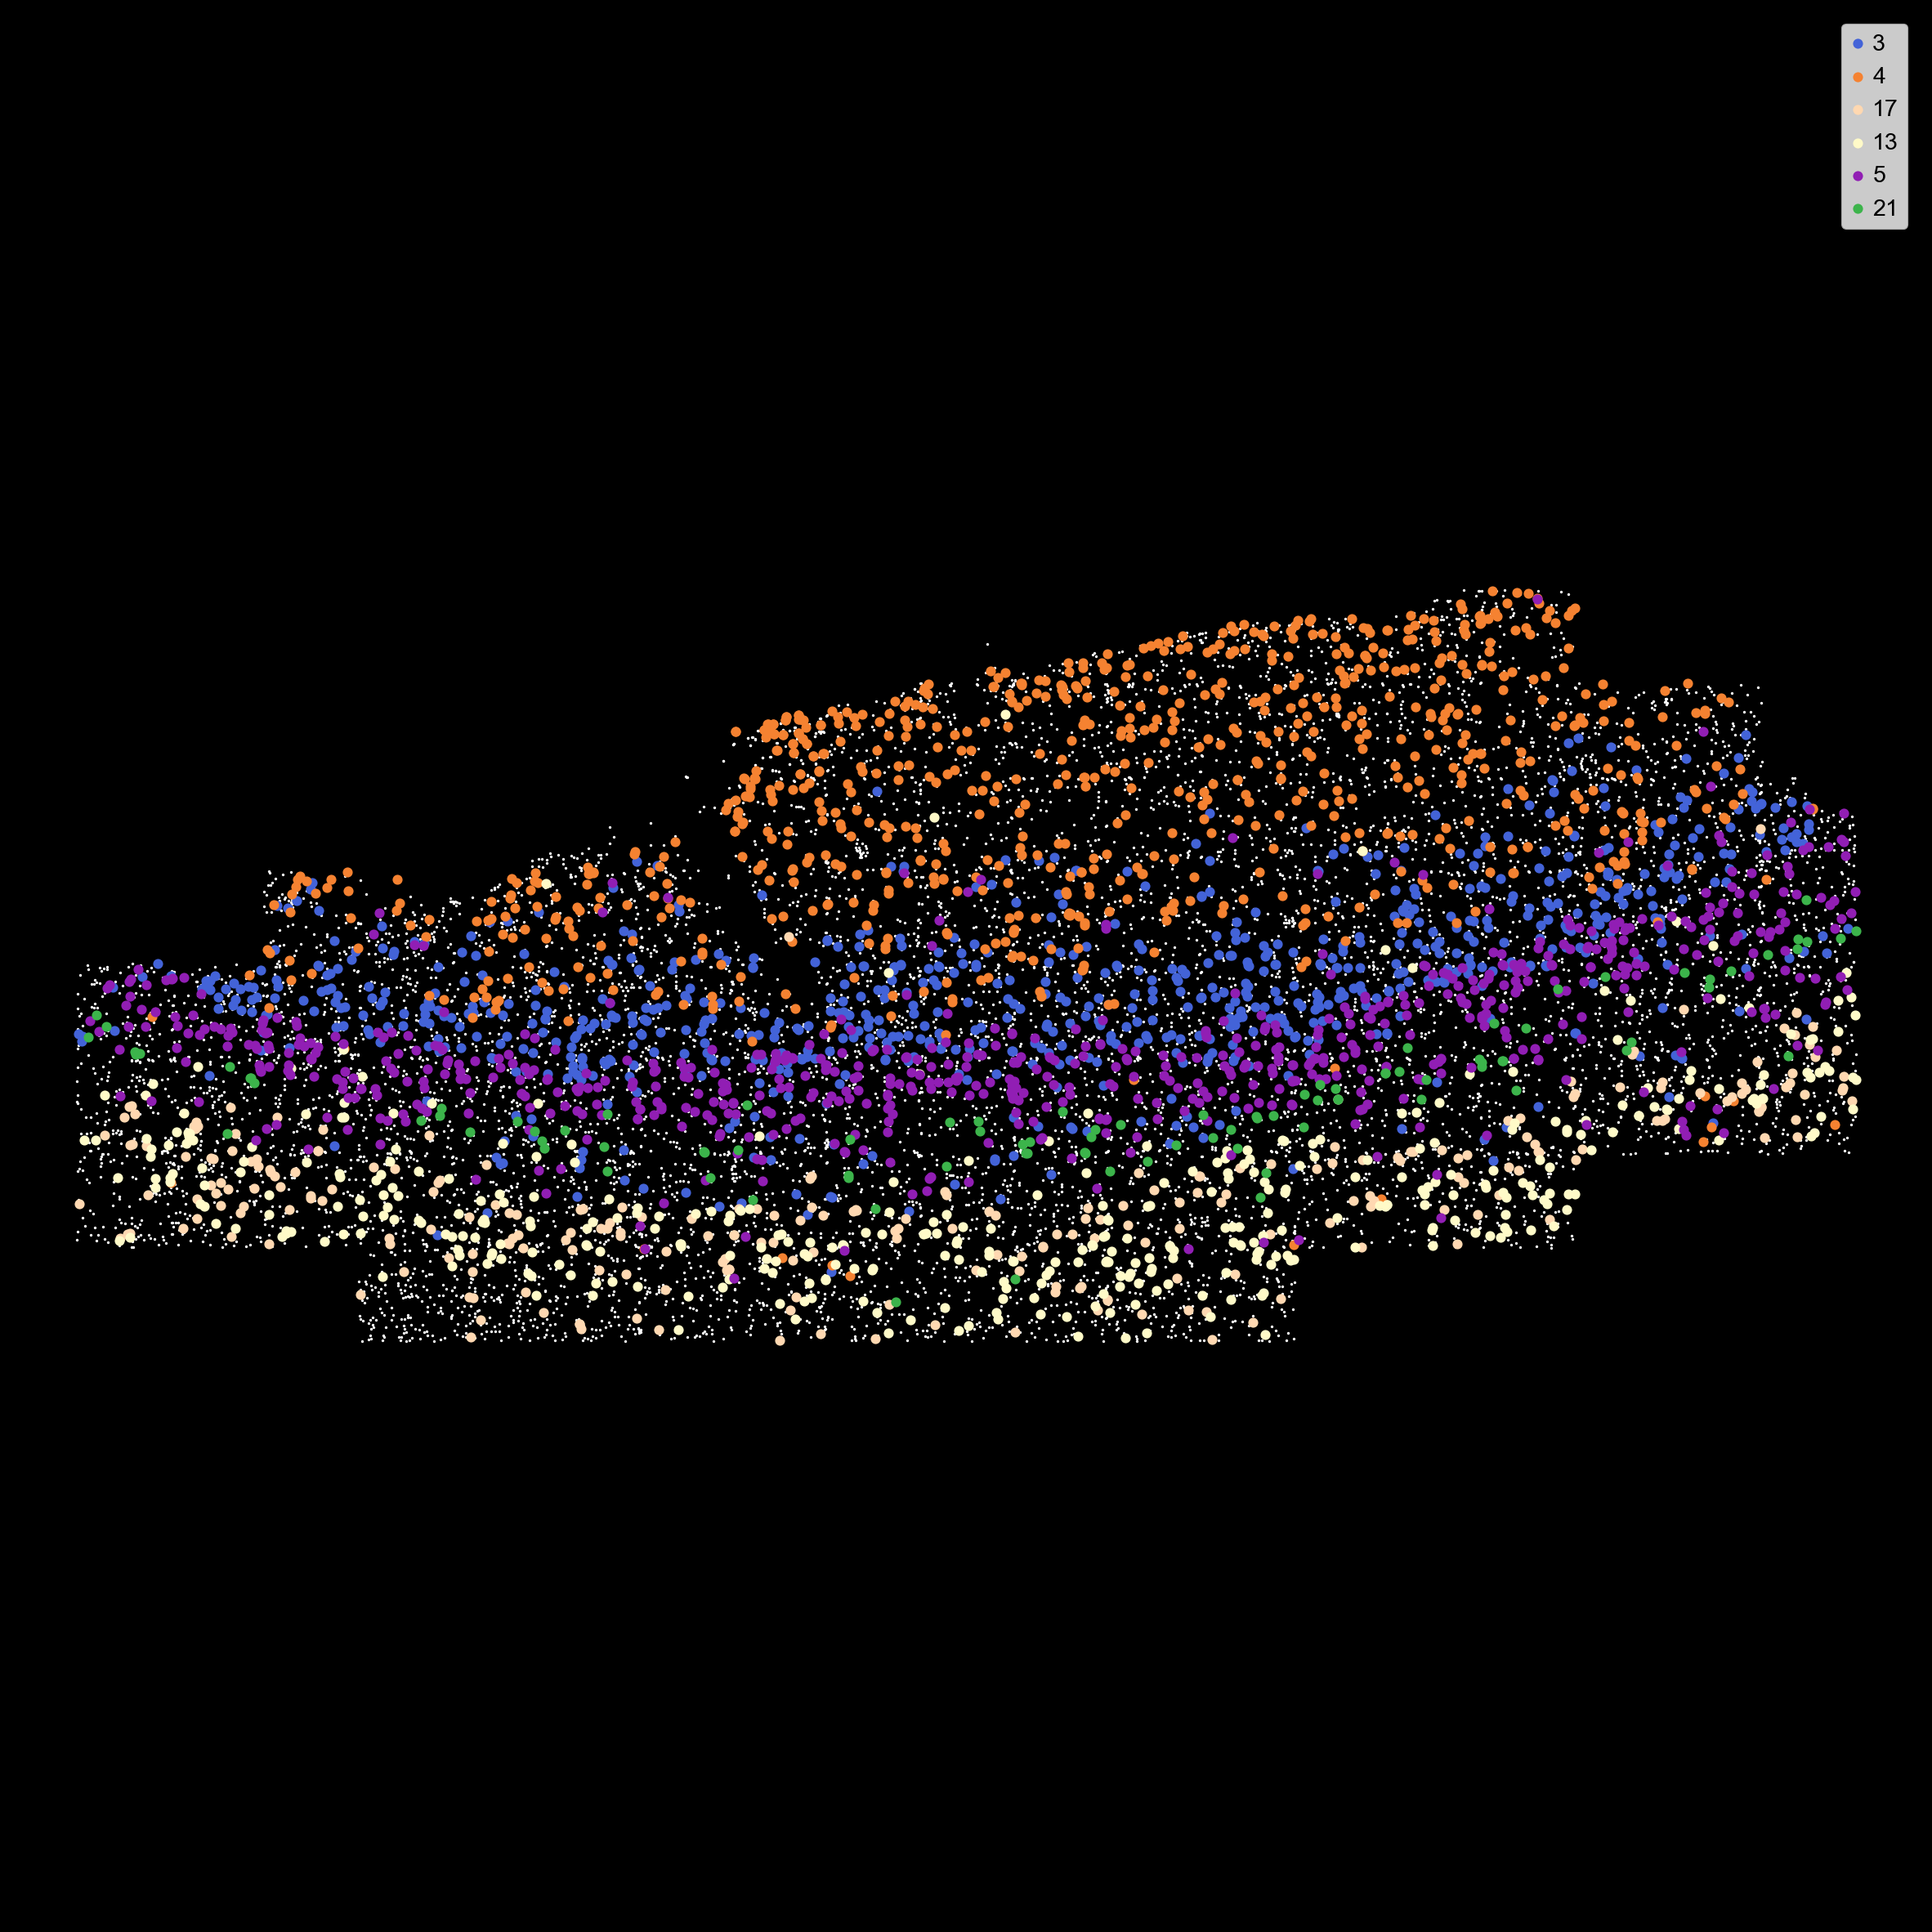

In [188]:
plt_clusters(clusters = [3,4,17,13,5,21])

In [89]:
import napari
napari.view_points(cm_cellsf);

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, -3961.6040000000003, 7139.0740000000005), zoom=0.08298181437535718, angles=(0.0, 0.0, 90.0), perspective=0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((-6789.332, -1132.876, 1.0), (5945.2, 8333.948, 1.0)), current_step=(2828, 1194), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'cm_cellsf' at 0x243b223ddc0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_v

In [66]:
final_counts

{'ASCL1': {5: 1,
  1000007: 1,
  1000012: 1,
  1000014: 2,
  1000016: 1,
  1000017: 1,
  1000018: 4,
  1000022: 5,
  1000027: 4,
  1000028: 7,
  1000029: 3,
  1000037: 1,
  1000039: 1,
  1000040: 2,
  1000046: 1,
  1000047: 8,
  1000054: 7,
  1000062: 7,
  1000069: 1,
  1000070: 1,
  1000073: 1,
  1000075: 1,
  2000001: 1,
  2000005: 1,
  2000006: 12,
  2000009: 1,
  2000010: 4,
  2000014: 1,
  2000018: 1,
  2000019: 1,
  2000027: 3,
  2000031: 1,
  2000034: 2,
  2000037: 1,
  2000041: 1,
  2000045: 1,
  2000048: 1,
  2000049: 1,
  2000050: 1,
  2000052: 1,
  2000057: 16,
  2000060: 1,
  2000061: 1,
  2000066: 1,
  2000067: 1,
  2000077: 1,
  2000099: 1,
  2000101: 1,
  2000116: 3,
  2000117: 2,
  2000120: 1,
  2000123: 1,
  2000132: 3,
  2000133: 2,
  3000004: 1,
  3000006: 5,
  3000007: 1,
  3000012: 2,
  3000016: 2,
  3000022: 1,
  3000028: 1,
  3000029: 5,
  3000032: 1,
  3000033: 1,
  3000036: 3,
  3000039: 1,
  3000050: 1,
  3000051: 1,
  3000052: 1,
  3000054: 1,
  3000064: 1,
 

In [55]:
get_ifov(zarr_fls[0]),zarr_fls[0]

(78, 'Y:\\Glass_MERFISH\\CGBB_ChrX_01_31_2023\\H0_C\\Conv_zscan__078.zarr')

In [46]:
all_cells = np.unique([c for gene in final_counts for c in final_counts[gene]])

In [48]:
all_cells

array([       1,        2,        5, ..., 71000151, 71000152, 71000153])

In [41]:
final_counts

{'ASCL1': {11000006: 3,
  11000007: 1,
  11000011: 1,
  11000017: 2,
  11000019: 4,
  11000020: 1,
  11000021: 2,
  11000024: 1,
  11000026: 1,
  11000028: 3,
  11000038: 2,
  11000041: 1,
  11000044: 2,
  11000045: 11,
  11000049: 2,
  11000052: 2,
  11000056: 1,
  11000060: 1,
  11000065: 1,
  11000079: 1,
  11000083: 2,
  11000084: 1,
  11000127: 1},
 'APLN': {11000006: 3,
  11000007: 1,
  11000011: 1,
  11000017: 2,
  11000019: 4,
  11000020: 1,
  11000021: 2,
  11000024: 1,
  11000026: 1,
  11000028: 3,
  11000038: 2,
  11000041: 1,
  11000044: 2,
  11000045: 11,
  11000049: 2,
  11000052: 2,
  11000056: 1,
  11000060: 1,
  11000065: 1,
  11000079: 1,
  11000083: 2,
  11000084: 1,
  11000127: 1},
 'APOE': {11000006: 3,
  11000007: 1,
  11000011: 1,
  11000017: 2,
  11000019: 4,
  11000020: 1,
  11000021: 2,
  11000024: 1,
  11000026: 1,
  11000028: 3,
  11000038: 2,
  11000041: 1,
  11000044: 2,
  11000045: 11,
  11000049: 2,
  11000052: 2,
  11000056: 1,
  11000060: 1,
  11000065

In [37]:

fl = fls[10]
#get_ifov(fl)


In [18]:
print(genes)

['ASCL1', 'APLN', 'APOE', 'CSF1R', 'ARX', 'AQP4', 'CSF2RA', 'BGN', 'ARHGEF6', 'DOCK11', 'CFTR', 'BEX1', 'FGF10', 'COL15A1', 'BMP2', 'FLT1', 'COL4A5', 'CD40LG', 'FMR1', 'EDA', 'CD74', 'FNDC1', 'EFNB1', 'DACH2', 'FOXP3', 'EGFL6', 'ENPEP', 'GAD1', 'FGF13', 'FBN2', 'IL1RAPL2', 'FREM2', 'FGFR3', 'LAMA4', 'FRZB', 'FILIP1L', 'MBP', 'HTR2C', 'GFAP', 'MRC1', 'IL13RA1', 'IFNG-AS1', 'MT-ATP6', 'LRIG3', 'IL3RA', 'MT-ND3', 'MAOA', 'ITM2A', 'MT-RNR1', 'MT-ND1', 'KLHL1', 'NPY', 'MT-ND4', 'LAMP5', 'PAX6', 'MT-RNR2', 'MT-ND2', 'PCDH11X', 'NRGN', 'MT-ND5', 'PLP1', 'OLIG1', 'NDP', 'PTCHD1-AS', 'OPALIN', 'ROBO1', 'PVALB', 'OPHN1', 'SYTL5', 'SMYD1', 'PDGFRA', 'TAC3', 'SST', 'RORB', 'TENM1', 'TRPC5', 'RPRM', 'TSIX', 'RTKN2', 'TYROBP', 'SCML4', 'VCAN', 'SMOC1', 'VIP', 'SRGN', 'Xist', 'SRPX2', 'TEX13A', 'TH', 'THEMIS', 'TIMP1', 'TMSB4X', 'TNNT2', 'WNT4']


In [21]:
gene = genes[0]


C:\Users\BINTUL~2\AppData\Local\Temp/ipykernel_27924/1628604275.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  gc/bc
